In [32]:
import input as i
import alg as a
import numpy as np
from importlib import reload
reload(i); reload(a);
import matplotlib.pyplot as plt
import pandas as pd
import time

# Quick Test: DPOA($\omega$)
A random instance with $D \in [0,100], B = 60$ with perfect predictor, $\omega = 0.1$.

In [25]:
w = .1

ins = i.Instance(w, B=60, predictor_std=0) # a random instant D
print("D = ", ins.D, " B = ", ins.B)
alg = a.DPOA(ins, w)
opt = a.OPT(ins)
print("{0:.3f}-consistant".format(alg/opt))

D =  69  B =  60
1.900-consistant


# Experiment 1: DPOA($\omega$)
$\omega = 0, 0.1,0.2,..., 1$; each scenario repeated 25 times; $B = 60$.

In [17]:
w_list = np.arange(0,1.1,.1)
repeat = 100
c_ratio = np.zeros((len(w_list), repeat))
for idx,w in enumerate(w_list):
    for j in np.arange(repeat):
        ins = i.Instance(B=50)
#         print("D = ", ins.D, " B = ", ins.B)

        alg = a.DPOA(ins, w)
        opt = a.OPT(ins)
#         print("{0:.3f}-consistant".format(alg/opt))
        c_ratio[idx, j] = alg/opt
        


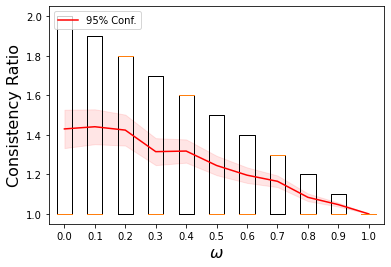

In [18]:
avg_ratio = np.mean(c_ratio, axis=1)
ci = 1.96 * np.std(c_ratio,axis=1)/np.sqrt(repeat)

plt.clf()
plt.xlabel("$\omega$", fontsize=16)
plt.ylabel("Consistency Ratio", fontsize=16)

plt.boxplot(c_ratio.transpose());
positions = np.arange(1, len(w_list)+1)

plt.plot(positions, avg_ratio, label="95% Conf.", color='r')
plt.fill_between(positions, (avg_ratio-ci), (avg_ratio+ci), color='r', alpha=.1)


formated_list = ['%.1f' % elem for elem in w_list ]
plt.xticks(positions, formated_list);

plt.legend(loc='upper left')

### With Noisy Predictor
$\sigma \in [0,2\times B]$ 

In [26]:
w = 0.5
std_list = np.arange(0,100,10)
repeat = 50
r_ratio = np.zeros((len(std_list), repeat))
for idx,std in enumerate(std_list):
    for j in np.arange(repeat):
        ins = i.Instance(B=50, predictor_std=std)
        alg = a.DPOA(ins, w)
        opt = a.OPT(ins)
        r_ratio[idx, j] = alg/opt

[1.24       1.33348971 1.45281973 1.63894204 1.49895826 1.40574817
 1.55957828 1.5573539  1.54456815 1.50401999]
[0.06924101 0.09488101 0.11714669 0.12273644 0.10620628 0.09997011
 0.11237181 0.10489704 0.13116491 0.12774097]


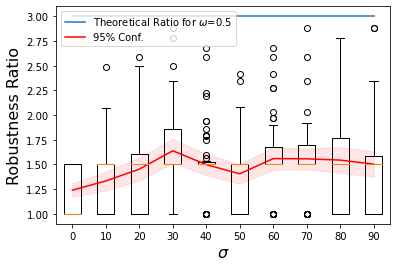

In [27]:
avg_ratio = np.mean(r_ratio, axis=1)
print(avg_ratio)
ci = 1.96 * np.std(r_ratio,axis=1)/np.sqrt(repeat)
print(ci)


plt.clf()
plt.xlabel("$\sigma$", fontsize=16)
plt.ylabel("Robustness Ratio", fontsize=16)

plt.boxplot(r_ratio.transpose());
ratio_theory = (2-w)/ (1-w)
plt.plot([1, 10], [ratio_theory, ratio_theory], label = "Theoretical Ratio for $\omega$=%.1f"%w)
positions = np.arange(1, len(std_list)+1)

plt.plot(positions, avg_ratio, label="95% Conf.", color='r')
plt.fill_between(positions, (avg_ratio-ci), (avg_ratio+ci), color='r', alpha=.1)


formated_list = [elem for elem in std_list ]
plt.xticks(positions, formated_list);
plt.legend(loc='upper left')

# Experiment 2: RPOA($\omega$)

In [28]:
w_list = np.arange(0,1,.1)
repeat = 50
alg_reps = 50
c_ratio = np.zeros((len(w_list), repeat))
for idx,w in enumerate(w_list):
    for j in np.arange(repeat):
        ins = i.Instance(B=50)
        alg_total = 0
        for l in range(alg_reps):
            alg_total += a.RPOA(ins, w)
        opt = a.OPT(ins)
        alg_avg = alg_total/alg_reps
        c_ratio[idx, j] = alg_avg/opt

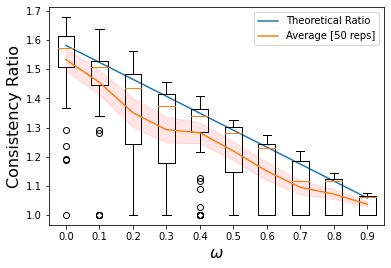

In [29]:
avg_ratio = np.mean(c_ratio, axis=1)
ci = 1.96 * np.std(c_ratio,axis=1)/np.sqrt(repeat)

plt.clf()
plt.xlabel("$\omega$", fontsize=16)
plt.ylabel("Consistency Ratio", fontsize=16)
plt.plot([1, 10], [(np.exp(1)-0)/(np.exp(1) - 1), (np.exp(1)-.9)/(np.exp(1) - 1)  ], label= "Theoretical Ratio")
plt.boxplot(c_ratio.transpose());
positions = np.arange(1, len(w_list)+1)
plt.plot(positions, avg_ratio, label = "Average [%d reps]"%alg_reps)
plt.fill_between(positions, (avg_ratio-ci), (avg_ratio+ci), color='r', alpha=.1)

formated_list = ['%.1f' % elem for elem in w_list ]
plt.xticks(positions, formated_list);
plt.legend()



### With Noisy Predictor
$\sigma \in [0,10, 2\times B]$ 

In [30]:
w = 0.3
std_list = np.arange(0,100,10)
repeat = 50
alg_reps = 1000
r_ratio = np.zeros((len(std_list), repeat))
for idx,std in enumerate(std_list):
    for j in np.arange(repeat):
        ins = i.Instance(B=50, predictor_std=std)
        alg_total = 0
        for l in range(alg_reps):
            alg_total += a.RPOA(ins, w)
        alg_avg = alg_total/alg_reps
        opt = a.OPT(ins)
        r_ratio[idx, j] = alg_avg/opt

[1.2948379  1.45798282 1.55337325 1.50119045 1.54113642 1.62621095
 1.58843087 1.50626898 1.61477597 1.61178754]
[0.04495649 0.05535504 0.05462999 0.05694617 0.05601813 0.06207821
 0.05610587 0.05690135 0.05982488 0.05852388]


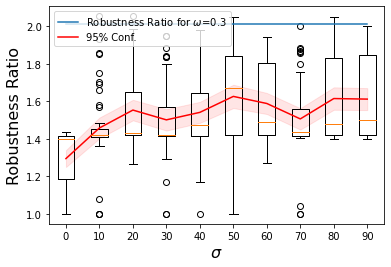

In [8]:
avg_ratio = np.mean(r_ratio, axis=1)
print(avg_ratio)
ci = 1.96 * np.std(r_ratio,axis=1)/np.sqrt(repeat)
print(ci)


plt.clf()
plt.xlabel("$\sigma$", fontsize=16)
plt.ylabel("Robustness Ratio", fontsize=16)

plt.boxplot(r_ratio.transpose());
ratio_theory = (np.exp(1)-w)/ ((np.exp(1)-1) * (1-w) )
plt.plot([1, 10], [ratio_theory, ratio_theory], label = "Robustness Ratio for $\omega$=%.1f"%w)
positions = np.arange(1, len(std_list)+1)

plt.plot(positions, avg_ratio, label="95% Conf.", color='r')
plt.fill_between(positions, (avg_ratio-ci), (avg_ratio+ci), color='r', alpha=.1)


formated_list = [elem for elem in std_list ]
plt.xticks(positions, formated_list);
plt.legend(loc='upper left')

# Experiment 3: OLPA
For different values of $k$

In [86]:
reload(i); reload(a)

B = .5
epsilon = .1
theta = 2 * np.log(12 * B ** 2 / epsilon)
K = int(np.ceil(12 * B ** 2 * theta / epsilon**2))
print("Theoretical bound: k >=", K)

K = 500
k_list = np.linspace(10,K,10, dtype=int)

repeat = 30

w_vals = np.zeros((len(k_list), repeat))
min_vals = np.zeros((len(k_list), repeat))

t1 = time.time()
t_ = t1
for idx,k in enumerate(k_list):
    print("k = %-7d | elapsed time %-4.2fs |  +%-4.2fs"%(k, time.time()-t1, time.time()-t_))
    t_ = time.time()
    for j in np.arange(repeat):
        m_ins = i.MultiInstance(K=k)  
        wind, min_R = a.OLPA(m_ins, W=10, e=epsilon)
        w_vals[idx, j] = wind
        min_vals[idx, j] = min_R
        print(" ↳rep %2d: olpa = %-3.2f  | min = %-3.2f "%(j, wind, min_R))
    
print("Exp. time %-4.2fs "%(time.time()-t1))

Theoretical bound: k >= 2041
k = 10      | elapsed time 0.00s |  +0.00s
 ↳rep  0: olpa = 0.49  | min = 0.34 
 ↳rep  1: olpa = 0.47  | min = 0.40 
 ↳rep  2: olpa = 0.55  | min = 0.37 
 ↳rep  3: olpa = 0.47  | min = 0.37 
 ↳rep  4: olpa = 0.60  | min = 0.45 
 ↳rep  5: olpa = 0.45  | min = 0.35 
 ↳rep  6: olpa = 0.67  | min = 0.46 
 ↳rep  7: olpa = 0.45  | min = 0.35 
 ↳rep  8: olpa = 0.52  | min = 0.40 
 ↳rep  9: olpa = 0.49  | min = 0.38 
 ↳rep 10: olpa = 0.60  | min = 0.39 
 ↳rep 11: olpa = 0.51  | min = 0.40 
 ↳rep 12: olpa = 0.64  | min = 0.46 
 ↳rep 13: olpa = 0.33  | min = 0.33 
 ↳rep 14: olpa = 0.48  | min = 0.37 
 ↳rep 15: olpa = 0.44  | min = 0.33 
 ↳rep 16: olpa = 0.56  | min = 0.40 
 ↳rep 17: olpa = 0.55  | min = 0.43 
 ↳rep 18: olpa = 0.39  | min = 0.31 
 ↳rep 19: olpa = 0.58  | min = 0.42 
 ↳rep 20: olpa = 0.58  | min = 0.39 
 ↳rep 21: olpa = 0.41  | min = 0.35 
 ↳rep 22: olpa = 0.50  | min = 0.43 
 ↳rep 23: olpa = 0.56  | min = 0.40 
 ↳rep 24: olpa = 0.49  | min = 0.39 
 ↳r

 ↳rep  2: olpa = 0.47  | min = 0.39 
 ↳rep  3: olpa = 0.44  | min = 0.36 
 ↳rep  4: olpa = 0.45  | min = 0.37 
 ↳rep  5: olpa = 0.45  | min = 0.38 
 ↳rep  6: olpa = 0.44  | min = 0.37 
 ↳rep  7: olpa = 0.46  | min = 0.39 
 ↳rep  8: olpa = 0.48  | min = 0.39 
 ↳rep  9: olpa = 0.44  | min = 0.37 
 ↳rep 10: olpa = 0.46  | min = 0.39 
 ↳rep 11: olpa = 0.46  | min = 0.38 
 ↳rep 12: olpa = 0.46  | min = 0.38 
 ↳rep 13: olpa = 0.44  | min = 0.37 
 ↳rep 14: olpa = 0.49  | min = 0.39 
 ↳rep 15: olpa = 0.44  | min = 0.36 
 ↳rep 16: olpa = 0.45  | min = 0.38 
 ↳rep 17: olpa = 0.44  | min = 0.37 
 ↳rep 18: olpa = 0.46  | min = 0.38 
 ↳rep 19: olpa = 0.45  | min = 0.37 
 ↳rep 20: olpa = 0.44  | min = 0.37 
 ↳rep 21: olpa = 0.47  | min = 0.39 
 ↳rep 22: olpa = 0.43  | min = 0.35 
 ↳rep 23: olpa = 0.45  | min = 0.37 
 ↳rep 24: olpa = 0.46  | min = 0.38 
 ↳rep 25: olpa = 0.44  | min = 0.37 
 ↳rep 26: olpa = 0.42  | min = 0.36 
 ↳rep 27: olpa = 0.45  | min = 0.37 
 ↳rep 28: olpa = 0.44  | min = 0.37 
 

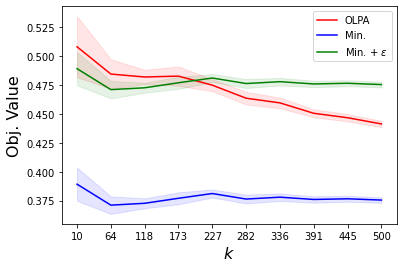

In [85]:
avg_w = np.mean(w_vals, axis=1)
avg_min = np.mean(min_vals, axis=1)
ci_w = 1.96 * np.std(w_vals,axis=1)/np.sqrt(repeat)
ci_min = 1.96 * np.std(min_vals,axis=1)/np.sqrt(repeat)



plt.clf()
plt.xlabel("$k$", fontsize=16)
plt.ylabel("Obj. Value", fontsize=16)

# plt.boxplot(r_ratio.transpose());

positions = np.arange(1, len(std_list)+1)

plt.plot(positions, avg_w, label="OLPA", color='r')
plt.fill_between(positions, (avg_w-ci_w), (avg_w+ci_w), color='r', alpha=.1)

plt.plot(positions, avg_min, label="Min.", color='b')
plt.fill_between(positions, (avg_min-ci_min), (avg_min+ci_min), color='b', alpha=.1)

plt.plot(positions, avg_min + epsilon, label="Min. + $\epsilon$", color='g')
plt.fill_between(positions, (avg_min+epsilon-ci_min), (avg_min+epsilon+ci_min), color='g', alpha=.1)

formated_list = [elem for elem in k_list ]
plt.xticks(positions, formated_list);
plt.legend(loc='upper right')